In [1]:
import json


In [2]:
from sklearn.utils import shuffle
import os
import pickle
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = np.load('data/' + ID + '.npy')

            # Store class
            y[i] = self.labels[ID]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.layers import Dense, Conv2D, Dropout
from keras.layers import Input   

def load_dense(json_obj, inp_layer):
    units = json_obj['units']
    activation = json_obj.get('activation', None)
    return Dense(units, activation=activation)(inp_layer)

def initialize(input_shape):
    return Input(shape=input_shape)

In [8]:
import json

json_network = json.load(open('first_network.json', 'r'))

In [4]:
layers = list()
inp_layer = initialize(json_network['input_shape'])

for layer in json_network['layers']:
    layer_in = layer['input']
    if layer_in == 'in':
        layers.append(load_dense(layer, inp_layer))
        continue
    layers.append(load_dense(layer, layers[layer_in]))
    
print(layers)
print(inp_layer)
print(layers[-1])

[<tf.Tensor 'dense_1/Relu:0' shape=(?, 100) dtype=float32>, <tf.Tensor 'dense_2/Relu:0' shape=(?, 50) dtype=float32>, <tf.Tensor 'dense_3/Softmax:0' shape=(?, 4) dtype=float32>]
Tensor("input_1:0", shape=(?, 200), dtype=float32)
Tensor("dense_3/Softmax:0", shape=(?, 4), dtype=float32)


(1000, 200)


(array([161.,   0.,   0., 247.,   0.,   0., 312.,   0.,   0., 280.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

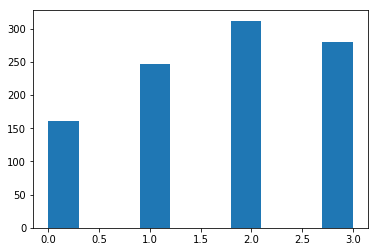

In [5]:
import pickle
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

% matplotlib inline


data = pickle.load(open(json_network['dataset'], 'rb'))
X_data = data['data']
y_data = data['label']

print(X_data.shape)
plt.hist(y_data)

In [9]:
from keras.models import Model

model = Model(inp_layer, layers[-1])
model.compile(json_network['optimizer'], json_network['loss'], metrics=['accuracy'])
model.fit(X_data, y_data, batch_size=json_network['batch_size'], 
          epochs=json_network['epochs'], validation_split=json_network['split'],
          shuffle=True)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 252us/step - loss: 1.2565 - acc: 0.4388 - val_loss: 1.3698 - val_acc: 0.2800
Epoch 2/10
800/800 [==============================] - 0s 36us/step - loss: 1.2315 - acc: 0.4913 - val_loss: 1.3763 - val_acc: 0.2950
Epoch 3/10
800/800 [==============================] - 0s 41us/step - loss: 1.2176 - acc: 0.4713 - val_loss: 1.3760 - val_acc: 0.3100
Epoch 4/10
800/800 [==============================] - 0s 44us/step - loss: 1.2033 - acc: 0.5012 - val_loss: 1.3937 - val_acc: 0.3000
Epoch 5/10
800/800 [==============================] - 0s 38us/step - loss: 1.1817 - acc: 0.4962 - val_loss: 1.3930 - val_acc: 0.2950
Epoch 6/10
800/800 [==============================] - 0s 43us/step - loss: 1.1575 - acc: 0.5087 - val_loss: 1.3941 - val_acc: 0.3100
Epoch 7/10
800/800 [==============================] - 0s 42us/step - loss: 1.1449 - acc: 0.5363 - val_loss: 1.4106 - val_acc: 0.2700
Epoch 8/10
800/800 [==

In [10]:
sample = model.predict(X_data[5:7])
print(y_data[5:7])
print(sample)

[1 3]
[[0.18006529 0.28861207 0.2784143  0.25290832]
 [0.06852186 0.30577177 0.1584787  0.4672276 ]]


AttributeError: module 'pickle' has no attribute 'save'

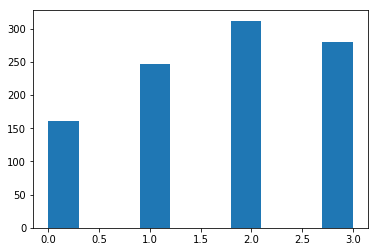

In [57]:
# Create the input
import numpy as np
import matplotlib.pyplot as plt
import pickle

% matplotlib inline

x = np.random.random([200, 1000])

fx = np.array([100*np.sin(x), 100*np.cos(x), np.square(x)*np.cos(x), 50*np.tanh(x)])
weighted_sum = 3 * fx[0] + 1 * fx[1] - 6 * fx[2]  - 10 * fx[3]
weighted_sum = np.sum(weighted_sum, axis=0)

y = ((weighted_sum / 600 + 2)).astype(np.int)
y = np.minimum(y, 4)
y = np.maximum(y, 1) - 1
plt.hist(y)
y_one_hot = np.zeros([len(y), np.max(y)+1])
y_one_hot[:, y] = 1


In [73]:
pickle_out = {'data': x.T, 'label': y}
pickle.dump(pickle_out, open('train.p', 'wb'))